In [21]:
from pyimzml.ImzMLParser import ImzMLParser
import numpy as np
import random
import math
import matplotlib.pyplot as plt



p = ImzMLParser('./Data/HIV.imzml')
X,Y,Z,C = [],[],[],[]
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    # Normalize intensities for this spectrum
    if len(intensities) > 0 and np.max(intensities) > 0:
        normalized_intensities = intensities / np.max(intensities)
    else:
        normalized_intensities = intensities
    
    for id in range(len(mzs)):
        if normalized_intensities[id] < 0.1 and idx >= 1: continue
        X.append(x)
        Y.append(y)
        Z.append(mzs[id])
        C.append(normalized_intensities[id])
    # if idx >= 500:
        # break    
print(len(X))
print(f"Min: {np.min(C)}")
print(f"Max: {np.max(C)}")
print(f"Mean: {np.mean(C)}")




617882
Min: 0.1000000461935997
Max: 1.0
Mean: 0.29164987802505493


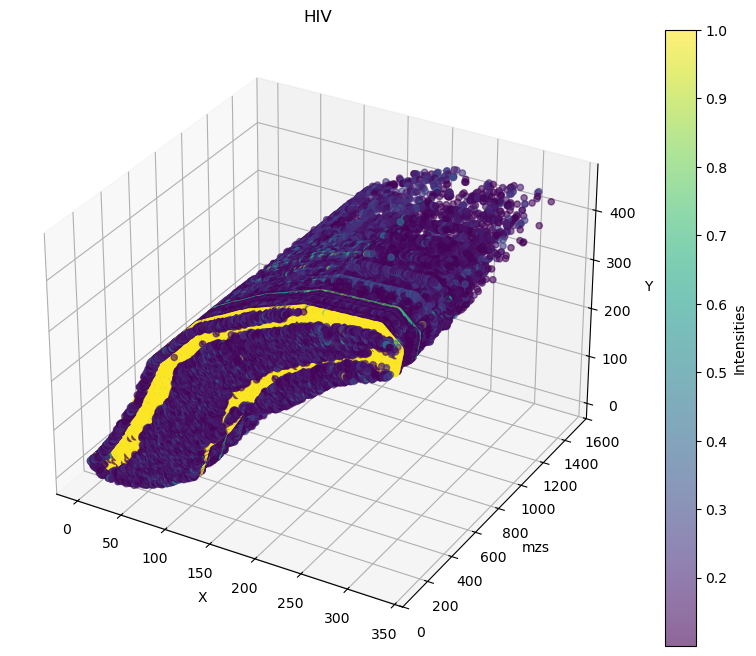

In [23]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X, Z, Y, c=C, cmap='viridis',alpha=0.6)

# Set labels and title
ax.set_xlabel('X')
ax.set_zlabel('Y')
ax.set_ylabel('mzs')
ax.set_title('HIV')

# Add a color bar
fig.colorbar(scatter, ax=ax, label='Intensities')

plt.show()